In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [2]:
def quant(df):
    rank = np.argsort(np.argsort(df.values, axis=0), axis=0)
    
    transformed = np.zeros(df.shape)
    
    for r in tqdm(range(rank.max() + 1)):
        transformed[rank == r] = df.values[rank == r].mean()
        
    return pd.DataFrame(transformed, index=df.index, columns=df.columns)

In [8]:
df = pd.DataFrame(
    [
        [1, 6, 3, ],
        [2, 5, 6, ],
        [4, 7, 5, ],
        [3, 8, 4, ],
    ],
    index = ["red", "green", "blue", "yellow"],
    columns = ["sample1", "sample2", "sample3"]
)

df = pd.DataFrame({'C1': {'A': 5, 'B': 2, 'C': 3, 'D': 4},
                   'C2': {'A': 4, 'B': 1, 'C': 4, 'D': 2},
                   'C3': {'A': 3, 'B': 4, 'C': 6, 'D': 8}})
df.index = ["red", "green", "blue", "yellow"]
df

,C1,C2,C3
red,5,4,3
green,2,1,4
blue,3,4,6
yellow,4,2,8


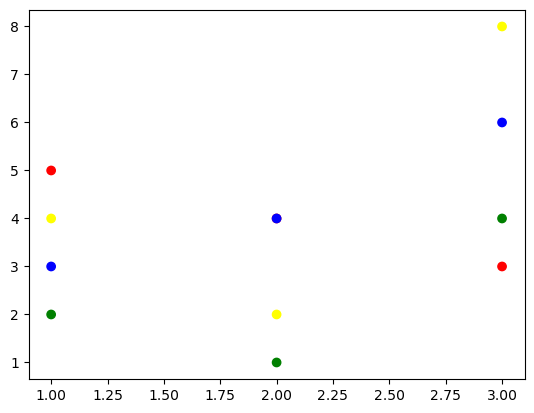

In [10]:
plt.scatter([1] * 4, df["C1"], c=df.index)
plt.scatter([2] * 4, df["C2"], c=df.index)
plt.scatter([3] * 4, df["C3"], c=df.index)

In [11]:
df_quantile = quant(df)

df_quantile

100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15621.24it/s]


,C1,C2,C3
red,5.666667,4.666667,2.000000
green,2.000000,2.000000,3.000000
blue,3.000000,5.666667,4.666667
yellow,4.666667,3.000000,5.666667


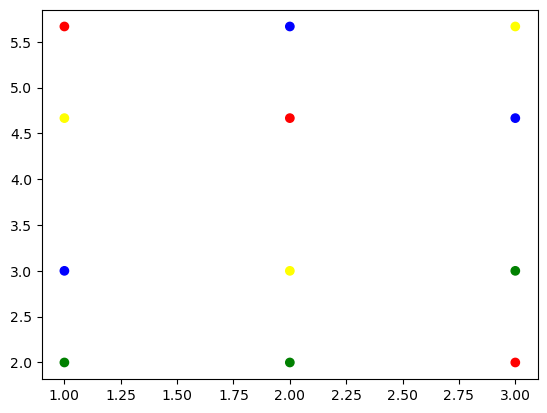

In [13]:
plt.scatter([1] * 4, df_quantile["C1"], c=df_quantile.index)
plt.scatter([2] * 4, df_quantile["C2"], c=df_quantile.index)
plt.scatter([3] * 4, df_quantile["C3"], c=df_quantile.index)